In [ ]:
import sys
import numpy as np
sys.path.append("/data/Beatriz/Doctorado GR/ADL_platform/S-ADL")
from SADL.visualization_module import DataVisualization


#### Generate synthetic data

In [4]:
np.random.seed(42)
data = np.random.rand(100,5)   


vis = DataVisualization(data, plot_technique='heatmap', heatmap_color='viridis')
vis.fit()  
vis.show()  


In [5]:
from sklearn.datasets import make_blobs

# Generate sample data
data1, labels = make_blobs(n_samples=300, centers=3, random_state=42)

# Visualization with PCA and scatter plot
vis = DataVisualization(data1, plot_technique='scatter', dim_reduction_technique='PCA', 
                        color_map=labels, point_size=10, opacity=0.7)
vis.fit()
vis.show()

In [6]:
#Testing without dimensionality reduction

# Histogram
vis_hist = DataVisualization(data, plot_technique='hist')
vis_hist.fit()
vis_hist.show()

# Boxplot 
vis_box = DataVisualization(data, plot_technique='boxplot')
vis_box.fit()
vis_box.show()

# Heatmap 
vis_heatmap = DataVisualization(data, plot_technique='heatmap')
vis_heatmap.fit()
vis_heatmap.show()

In [7]:
#Testing with dimensionality reduction

# t-SNE
vis_tsne = DataVisualization(data, plot_technique='scatter', dim_reduction_technique='t-SNE', n_components=2)
vis_tsne.fit()
vis_tsne.show()

# UMAP
vis_umap = DataVisualization(data, plot_technique='scatter', dim_reduction_technique='UMAP', n_components=2)
vis_umap.fit()
vis_umap.show()

/data/Beatriz/Doctorado GR/ADL_platform/S-ADL/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



### Test with model AutoEncoder flexanomalies

In [ ]:
from SADL.visualization_module import DataVisualization
from SADL.federated_data.algorithms import flexanomalies
from SADL.static_data.static_datasets_uci import global_load
from sklearn.model_selection import train_test_split

#from flexanomalies.utils.load_data import load_and_split_dot_mat
# X_train, X_test, y_train, y_test = load_and_split_dot_mat(
#     "/data/Beatriz/Doctorado GR/ADL_platform/S-ADL/datasets/data/shuttle.mat", 0.3
# )

X,y = global_load('default_of_credit_card_clients')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [3]:
from SADL.federated_data.algorithms import flexanomalies

kwargs = {
    "algorithm_": "autoencoder",
    "contamination":0.1,
    "label_parser": None,
     "epochs": 100,
     "input_dim": X_train.shape[1],
     "batch_size": 8,
     "neurons": [16,8, 16],
     "hidden_act": ['relu', 'relu', 'relu'],
     "n_clients":2,
     "n_rounds":10,
     }

modelAE = flexanomalies.FlexAnomalyDetection(**kwargs)
print(modelAE.get_params())

Federated Params:{'n_clients': 2, 'n_rounds': 10} 
 Model Params:{'algorithm_': 'autoencoder', 'contamination': 0.1, 'label_parser': None, 'epochs': 100, 'input_dim': 23, 'batch_size': 8, 'neurons': [16, 8, 16], 'hidden_act': ['relu', 'relu', 'relu']}
Inspecting model's attributes:
contamination: 0.1
input_dim: 23
neurons: [16, 8, 16]
model_path: 
w_size: None
n_pred: 1
callbacks: [<keras.src.callbacks.early_stopping.EarlyStopping object at 0x74b6bce919f0>]
hidden_act: ['relu', 'relu', 'relu']
output_act: linear
loss: mse
validation_size: 0.2
batch_size: 8
epochs: 100
optimizer: adam
preprocess: True
scaler: StandardScaler()
model: <Sequential name=sequential_1, built=True>
algorithm_: autoencoder
label_parser: None
{'label_parser': None, 'algorithm_': 'autoencoder', 'contamination': 0.1, 'input_dim': 23, 'neurons': [16, 8, 16], 'model_path': '', 'w_size': None, 'n_pred': 1, 'callbacks': [<keras.src.callbacks.early_stopping.EarlyStopping object at 0x74b6bce919f0>], 'hidden_act': ['relu

/data/Beatriz/Doctorado GR/ADL_platform/S-ADL/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-12 14:29:36.666645: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
from SADL.static_data.preprocessing.preprocessing_static import StandardScalerPreprocessing 
scaler = StandardScalerPreprocessing()
X_scaled = scaler.fit_transform(X_train)
vis = DataVisualization(X_scaled, plot_technique='scatter', dim_reduction_technique='PCA', n_components=2)
vis.fit()
vis.show()

In [5]:
modelAE.fit(X_train,y_train)


Running round: 0

Training model at client.
Epoch 1/100


/data/Beatriz/Doctorado GR/ADL_platform/S-ADL/venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 



1080/1080 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6929 - val_loss: 0.4072
Epoch 2/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3866 - val_loss: 0.3232
Epoch 3/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3082 - val_loss: 0.2871
Epoch 4/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2815 - val_loss: 0.2600
Epoch 5/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2581 - val_loss: 0.2303
Epoch 6/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2294 - val_loss: 0.2136
Epoch 7/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2086 - val_loss: 0.2032
Epoch 8/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1895 - val_loss: 0.1986
Epoch 9/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1875 - val_loss: 0.1931
Epoch 10/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1812 - val_loss: 0.1819
Epoch 11/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1786 - val_loss: 0.1789
Epoch 12/100
1080/1080 ━━━━━━━━

/data/Beatriz/Doctorado GR/ADL_platform/S-ADL/venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 



1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2239 - val_loss: 0.1480
Epoch 2/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1463 - val_loss: 0.1351
Epoch 3/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1405 - val_loss: 0.1255
Epoch 4/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1263 - val_loss: 0.1238
Epoch 5/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1240 - val_loss: 0.1199
Epoch 6/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1236 - val_loss: 0.1210
Epoch 7/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - loss: 0.1195 - val_loss: 0.1185
Epoch 8/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1207 - val_loss: 0.1163
Epoch 9/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1194 - val_loss: 0.1147
Epoch 10/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - loss: 0.1139 - val_loss: 0.1190
Epoch 11/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1191 - val_loss: 0.1146
Epoch 12/100
1080/1080 ━━━━

/data/Beatriz/Doctorado GR/ADL_platform/S-ADL/venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 



1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - loss: 0.1109 - val_loss: 0.1051
Epoch 2/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - loss: 0.1037 - val_loss: 0.1058
Epoch 3/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - loss: 0.1091 - val_loss: 0.1032
Epoch 4/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - loss: 0.1116 - val_loss: 0.1054
Epoch 5/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - loss: 0.1086 - val_loss: 0.1035
Epoch 6/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - loss: 0.1103 - val_loss: 0.1046
Epoch 7/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - loss: 0.1079 - val_loss: 0.1019
Epoch 8/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - loss: 0.1020 - val_loss: 0.1015
Epoch 9/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - loss: 0.1026 - val_loss: 0.1011
Epoch 10/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - loss: 0.1083 - val_loss: 0.0973
Epoch 11/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - loss: 0.0989 - val_loss: 0.0949
Epoch 12/

/data/Beatriz/Doctorado GR/ADL_platform/S-ADL/venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 



Training model at client.
Epoch 1/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0919 - val_loss: 0.0949
Epoch 2/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0883 - val_loss: 0.0954
Epoch 3/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0886 - val_loss: 0.0966
Epoch 4/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0867 - val_loss: 0.0981
Epoch 5/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0898 - val_loss: 0.0987
Epoch 6/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0903 - val_loss: 0.0961
Epoch 7/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1011 - val_loss: 0.0948
Epoch 8/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0954 - val_loss: 0.0942
Epoch 9/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0872 - val_loss: 0.0957
Epoch 10/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0884 - val_loss: 0.0979
Epoch 11/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0860 - val_loss: 

/data/Beatriz/Doctorado GR/ADL_platform/S-ADL/venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 



1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - loss: 0.0906 - val_loss: 0.1013
Epoch 2/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - loss: 0.0851 - val_loss: 0.1045
Epoch 3/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - loss: 0.0863 - val_loss: 0.1052
Epoch 4/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - loss: 0.0865 - val_loss: 0.1061
Epoch 5/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - loss: 0.0856 - val_loss: 0.1041
Epoch 6/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - loss: 0.0859 - val_loss: 0.1049
Epoch 7/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - loss: 0.0875 - val_loss: 0.1086
Epoch 8/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - loss: 0.0845 - val_loss: 0.1088
Epoch 9/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - loss: 0.0849 - val_loss: 0.1065
Epoch 10/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - loss: 0.0864 - val_loss: 0.1103
Epoch 11/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - loss: 0.0852 - val_loss: 0.1072
Epoch 11:

/data/Beatriz/Doctorado GR/ADL_platform/S-ADL/venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 



1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - loss: 0.0918 - val_loss: 0.0867
Epoch 2/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - loss: 0.0930 - val_loss: 0.0865
Epoch 3/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - loss: 0.0900 - val_loss: 0.0889
Epoch 4/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - loss: 0.0940 - val_loss: 0.0867
Epoch 5/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - loss: 0.0933 - val_loss: 0.0861
Epoch 6/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - loss: 0.0890 - val_loss: 0.0866
Epoch 7/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - loss: 0.0898 - val_loss: 0.0941
Epoch 8/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - loss: 0.0866 - val_loss: 0.0903
Epoch 9/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - loss: 0.0935 - val_loss: 0.0903
Epoch 10/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - loss: 0.0882 - val_loss: 0.0895
Epoch 11/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - loss: 0.0901 - val_loss: 0.0873
Epoch 11:

/data/Beatriz/Doctorado GR/ADL_platform/S-ADL/venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 



1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - loss: 0.0898 - val_loss: 0.1170
Epoch 2/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - loss: 0.1347 - val_loss: 0.0827
Epoch 3/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - loss: 0.0877 - val_loss: 0.0818
Epoch 4/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - loss: 0.0883 - val_loss: 0.0830
Epoch 5/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - loss: 0.0975 - val_loss: 0.0828
Epoch 6/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - loss: 0.0910 - val_loss: 0.0822
Epoch 7/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - loss: 0.0886 - val_loss: 0.0817
Epoch 8/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0894 - val_loss: 0.0853
Epoch 9/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - loss: 0.0905 - val_loss: 0.0835
Epoch 10/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - loss: 0.0991 - val_loss: 0.0821
Epoch 11/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - loss: 0.0945 - val_loss: 0.0845
Epoch 12/10

/data/Beatriz/Doctorado GR/ADL_platform/S-ADL/venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 



1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - loss: 0.0932 - val_loss: 0.0885
Epoch 2/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - loss: 0.0909 - val_loss: 0.0888
Epoch 3/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - loss: 0.0869 - val_loss: 0.0922
Epoch 4/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - loss: 0.0862 - val_loss: 0.0892
Epoch 5/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - loss: 0.0892 - val_loss: 0.0884
Epoch 6/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - loss: 0.0869 - val_loss: 0.0895
Epoch 7/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - loss: 0.0879 - val_loss: 0.0900
Epoch 8/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - loss: 0.0887 - val_loss: 0.0888
Epoch 9/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - loss: 0.0937 - val_loss: 0.0886
Epoch 10/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - loss: 0.0912 - val_loss: 0.0907
Epoch 11/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - loss: 0.0909 - val_loss: 0.0920
Epoch 11:

/data/Beatriz/Doctorado GR/ADL_platform/S-ADL/venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 



1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0890 - val_loss: 0.0853
Epoch 2/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0977 - val_loss: 0.0865
Epoch 3/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - loss: 0.0921 - val_loss: 0.0853
Epoch 4/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0873 - val_loss: 0.0883
Epoch 5/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - loss: 0.0903 - val_loss: 0.0889
Epoch 6/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0875 - val_loss: 0.0874
Epoch 7/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - loss: 0.0899 - val_loss: 0.0873
Epoch 8/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0872 - val_loss: 0.0886
Epoch 9/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - loss: 0.0923 - val_loss: 0.0874
Epoch 10/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - loss: 0.0929 - val_loss: 0.0870
Epoch 11/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - loss: 0.0876 - val_loss: 0.0883
Epoch 11: early sto

/data/Beatriz/Doctorado GR/ADL_platform/S-ADL/venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 



1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0887 - val_loss: 0.0882
Epoch 2/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - loss: 0.0896 - val_loss: 0.0865
Epoch 3/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - loss: 0.0887 - val_loss: 0.0892
Epoch 4/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - loss: 0.0877 - val_loss: 0.0868
Epoch 5/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - loss: 0.0897 - val_loss: 0.0878
Epoch 6/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - loss: 0.0885 - val_loss: 0.0892
Epoch 7/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - loss: 0.0926 - val_loss: 0.0938
Epoch 8/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - loss: 0.0882 - val_loss: 0.0867
Epoch 9/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - loss: 0.0885 - val_loss: 0.0863
Epoch 10/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - loss: 0.0875 - val_loss: 0.0904
Epoch 11/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - loss: 0.0858 - val_loss: 0.0888
Epoch 11: e

In [6]:
modelAE.predict(X_test)
modelAE.model.labels_

modelAE.evaluate(X_test,y_test)
print(modelAE.model.d_scores_)  


Inspecting model's attributes:
contamination: 0.1
input_dim: 23
neurons: [16, 8, 16]
model_path: 
w_size: None
n_pred: 1
callbacks: [<keras.src.callbacks.early_stopping.EarlyStopping object at 0x74b6bce919f0>]
hidden_act: ['relu', 'relu', 'relu']
output_act: linear
loss: mse
validation_size: 0.2
batch_size: 8
epochs: 100
optimizer: adam
preprocess: True
scaler: StandardScaler()
model: <Sequential name=sequential_1, built=True>
algorithm_: autoencoder
label_parser: None
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step
Acc: 72.150% 

Precision: 0.213 

F1score: 0.133 

Recall: 0.096 

AUC_ROC: 0.498 

[1.9342759  1.15160028 0.37147098 ... 1.8349456  1.21399952 0.81305944]


In [7]:
true =np.array(y_test).flatten()
pred = np.array(modelAE.model.labels_).astype(int)


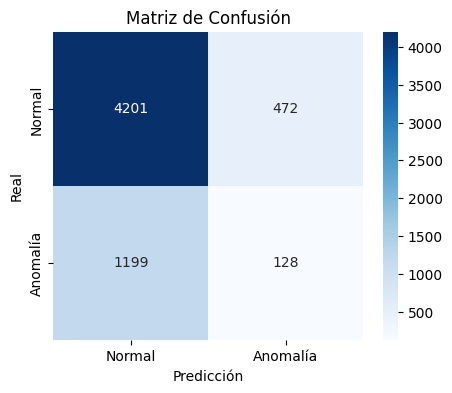

In [8]:
# Confusion Matrix 
from SADL.metrics_module import plot_confusion_matrix
plot_confusion_matrix(true,pred)

In [9]:
# Plot Anomaly Labels 
visualizer = DataVisualization(data=None, plot_technique='anomaly_labels', y_true=true[40:60], y_pred=pred[40:60])
visualizer.show()

In [11]:

visualizer = DataVisualization(data=X_test, plot_technique='plot_anomaly', dim_reduction_technique='PCA', y_true=true, y_pred=pred,subset_size_percent=0.2)
visualizer.fit()
visualizer.show()